In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
data = Table.read('3DHST_Allfields.fits')

In [3]:
print(data)

  id  fieldnr field ...  lsfr         UmV                VmJ        
----- ------- ----- ... ------ ------------------ ------------------
  371       1   COS ...   0.29  1.512697758853692  1.103149830754574
  419       1   COS ...   1.15 0.8545426058007245 0.6844496655278218
  431       1   COS ...  -0.67 0.7890044278411936 0.3758958366095265
  445       1   COS ...   -0.8  2.233808160656129 1.4830089803500717
  457       1   COS ...  -0.66 0.6380218585520303 0.4037019434711371
  540       1   COS ...   0.44 0.9906394658284329 0.8831850794882622
  579       1   COS ...   1.14  2.302854774777283  2.170686790556522
  593       1   COS ...  -0.45 0.7566021336386908 0.3875397754965964
  623       1   COS ...   1.02 1.0798872663372283  1.467110941271971
  729       1   COS ...  -0.49 1.1498884801572702 1.3356569317823617
  ...     ...   ... ...    ...                ...                ...
37914       5    GN ...   -0.6  0.928431089692766  0.299293755631163
37917       5    GN ...   0.88 1.0

In [15]:
z = data['z_best']
z_err_l = data['z_best_l68']     # Lower error
z_err_u = data['z_best_u68']     # Upper error

umv = data['UmV']
vmj = data['VmJ']

Minimum redshift: z = 0.23
Maximum redshift: z = 2.99




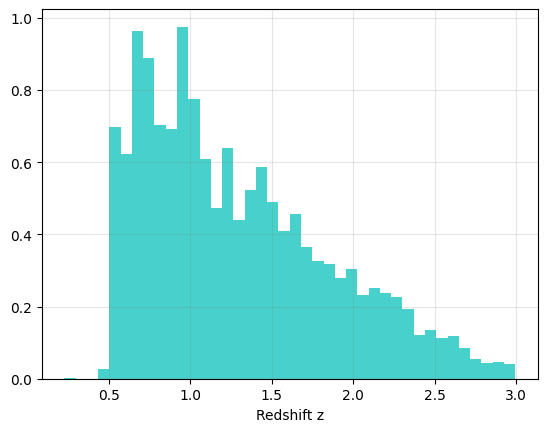

In [23]:
print('Minimum redshift: z = %.2f' % np.min(z))
print('Maximum redshift: z = %.2f' % np.max(z))
print('\n')

plt.hist(z, bins = 40, range=[np.min(z), np.max(z)], density = True, color = 'mediumturquoise')
plt.grid(alpha = 0.2, c = 'grey')
plt.xlabel('Redshift z')
plt.show()

############################################################################################################################
# "Cosa scelgo come intervalli?" Devi definire un subset di indici che rispettano certe condizioni -> mask oppure where.
# array[</> tot] -> true/false
# "Da scienziata, cosa decido per intervalli?" -> Matematicamente: "Ho tanti dati in certi intervalli e meno in altri -> 
# bin più stretti dove ho più dati, per maggiore precisione." Fisicamente: "Il redshift non è lineare, a redshift minori
# corrispondono tempi minori??? (Non mi è ben chiaro, però questa cosa ha detto qualcosa del genere del "la prima parte con
# un bin piccolo e la seconda parte con un bin largo e più o meno il tempo è lo stesso". Check!)
############################################################################################################################

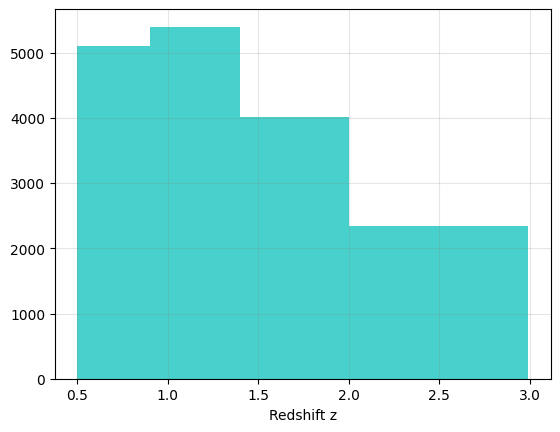

In [52]:
# Comincia da 0.5 perché prima hai quasi zero galassie

plt.hist(z, bins = [0.5, 0.9, 1.4, 2, np.max(z)], density = False, color = 'mediumturquoise')
plt.grid(alpha = 0.2, c = 'grey')
plt.xlabel('Redshift z')
plt.show()

In [55]:
mask1 = (z>=0.5) & (z<0.9)
mask2 = (z>=0.9) & (z<1.4)
mask3 = (z>=1.4) & (z<2)
mask4 = z>=2

z1 = z[mask1]
z2 = z[mask2]
z3 = z[mask3]
z4 = z[mask4]

print(len(z1))
print(len(z2))
print(len(z3))
print(len(z4))

print('\nLunghezze degli array')

print(len(z1) + len(z2) + len(z3) + len(z4))
print(len(z))

# Ne mancano tre prima del 0.5

5107
5397
4008
2344

Lunghezze degli array
16856
16859


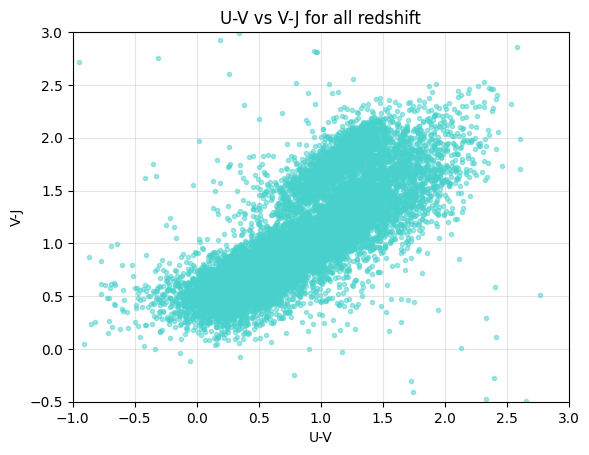

In [75]:
plt.plot(vmj, umv, c = 'mediumturquoise', marker = 'o', ms = 3, ls='', alpha = 0.5)
plt.grid(alpha=0.2, c='grey')
plt.xlim([-1, 3])
plt.ylim([-0.5, 3])
plt.xlabel('U-V')
plt.ylabel('V-J')
plt.title('U-V vs V-J for all redshift')
plt.show()

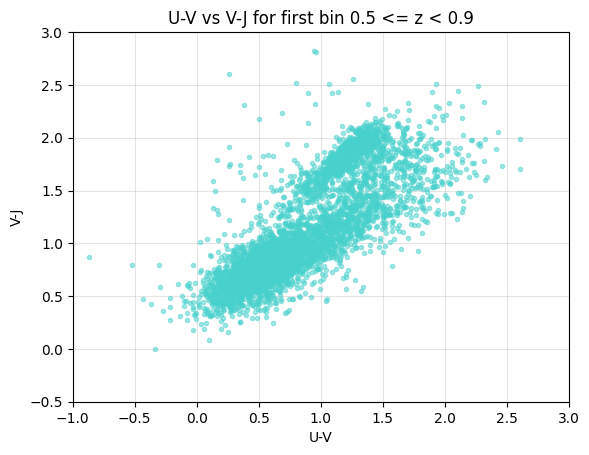

In [74]:
# Now for the bins:
plt.plot(vmj[mask1], umv[mask1], c = 'mediumturquoise', marker = 'o', ms = 3, ls='', alpha = 0.5)
plt.grid(alpha=0.2, c='grey')
plt.xlim([-1, 3])
plt.ylim([-0.5, 3])
plt.xlabel('U-V')
plt.ylabel('V-J')
plt.title('U-V vs V-J for first bin 0.5 <= z < 0.9')
plt.show()

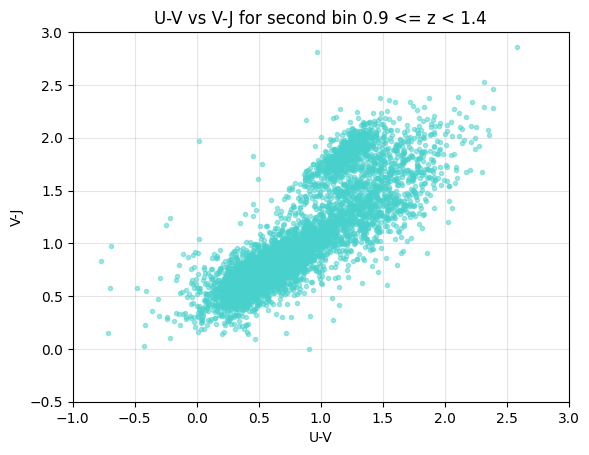

In [73]:
# Now for the bins:
plt.plot(vmj[mask2], umv[mask2], c = 'mediumturquoise', marker = 'o', ms = 3, ls='', alpha = 0.5)
plt.grid(alpha=0.2, c='grey')
plt.xlim([-1, 3])
plt.ylim([-0.5, 3])
plt.xlabel('U-V')
plt.ylabel('V-J')
plt.title('U-V vs V-J for second bin 0.9 <= z < 1.4')
plt.show()

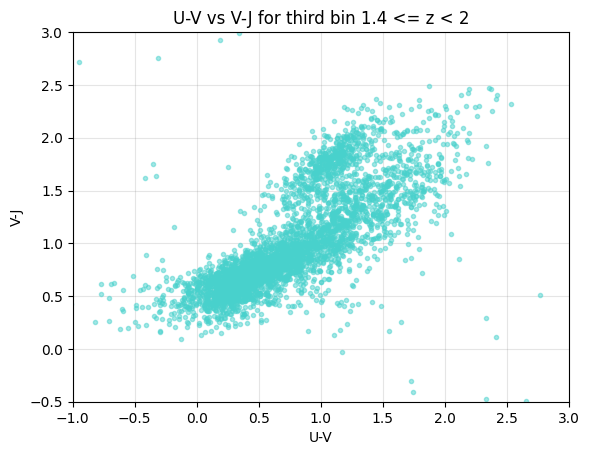

In [76]:
# Now for the bins:
plt.plot(vmj[mask3], umv[mask3], c = 'mediumturquoise', marker = 'o', ms = 3, ls='', alpha = 0.5)
plt.grid(alpha=0.2, c='grey')
plt.xlim([-1, 3])
plt.ylim([-0.5, 3])
plt.xlabel('U-V')
plt.ylabel('V-J')
plt.title('U-V vs V-J for third bin 1.4 <= z < 2')
plt.show()

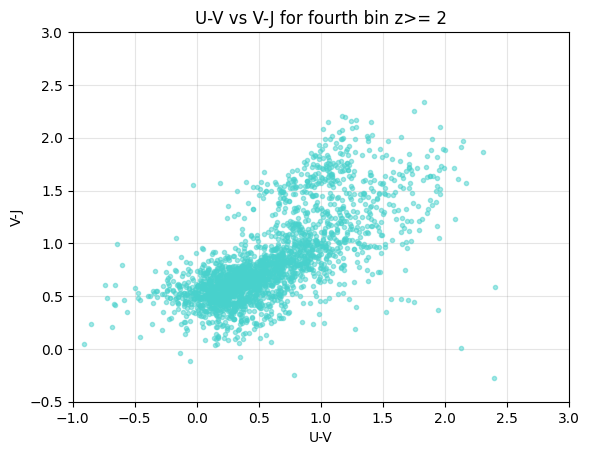

In [77]:
# Now for the bins:
plt.plot(vmj[mask4], umv[mask4], c = 'mediumturquoise', marker = 'o', ms = 3, ls='', alpha = 0.5)
plt.grid(alpha=0.2, c='grey')
plt.xlim([-1, 3])
plt.ylim([-0.5, 3])
plt.xlabel('U-V')
plt.ylabel('V-J')
plt.title('U-V vs V-J for fourth bin z>= 2')
plt.show()